In [1]:
import pandas as pd
%pylab inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


Задача - провести такой же анализ, как представлено в примере, на своем датасете. 
В данном примере разобрана кластеризация вин по трем сортам на основании их химических характеристик

Считаем данные.
Dataset - Wines from Italy:
http://archive.ics.uci.edu/ml/datasets/Wine 

In [2]:
df = pd.read_csv('wine.data.txt', names=['Cultivar', 'Alcohol', 
                                         'Malic acid', 'Ash', 
                                         'Alcalinity of ash', 'Magnesium', 
                                         'Total phenols', 'Flavanoids', 
                                         'Nonflavanoid phenols', 'Proanthocyanins', 
                                         'Color intensity', 'Hue', 
                                         'OD280/OD315 of diluted wines', 'Proline'])
df.head()

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Разобьем данные на предикторы и отклик

In [5]:
X = df.drop('Cultivar', axis=1)
y = df['Cultivar'].values

Выполним стандартизацию (у нас все данные являются вещественными числами):

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 1. Главные компоненты:

Определим 2 главные компоненты и построим соответствующую визуализацию:

Proportion of variance explained:
Component #1: 0.36
Component #2: 0.19
Directions of principal components:
Component #1: [ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
  0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
  0.28675223]
Component #2: [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
  0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
 -0.36490283]


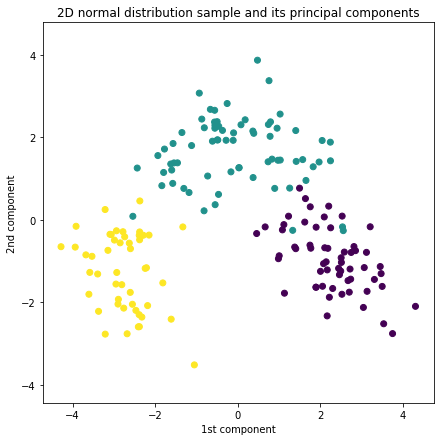

In [9]:
pca = PCA(2)
X_reduced = pca.fit_transform(X_scaled)

print('Proportion of variance explained:')
for i in range(len(pca.explained_variance_ratio_)):
    print('Component #%s: %.2f' % (i+1, pca.explained_variance_ratio_[i]))
    
print('Directions of principal components:')
for i in range(len(pca.components_)):
    print('Component #%s: %s' % (i+1, pca.components_[i]))
    
plt.figure(figsize=(7,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.axis('equal')
plt.title('2D normal distribution sample and its principal components')
plt.xlabel('1st component')
plt.ylabel('2nd component')

### 2. Кластеризация по KMeans:

Выполним кластеризацию по двум найденным компонентам и визуально сравним результаты с реальными метками

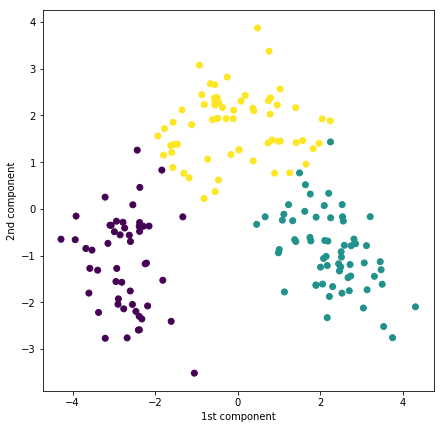

In [18]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(X_reduced)

plt.figure(figsize=(7,7))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=kmeans.labels_)
plt.xlabel('1st component')
plt.ylabel('2nd component')

**Вывод: результат очень близок к реальным меткам**